<a href="https://colab.research.google.com/github/JennEYoon/ECG-transform/blob/main/notebooks/ecg_split_scipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ECG data, simple split test, using SciPy library  
PTB-XL data, 1st patient from g1 folder.  
Author: Jennifer Yoon  
Date: Dec 22, 2024 10:30pm start.

In [11]:
# Copy example file from Google Drive, ptb-xl 1st client, g1 folder

file1 = "HR00001.mat"
file2= "HR00001.hea"
path1 = "/content/drive/MyDrive/data/ECG-transform/data/ptb-xl/g1"

!cp /content/drive/MyDrive/data/ECG-transform/data/ptb-xl/g1/HR00001.mat .
!cp /content/drive/MyDrive/data/ECG-transform/data/ptb-xl/g1/HR00001.hea .
!ls

drive  HR00001.hea  HR00001.mat  sample_data


In [10]:
# Later, figure out later how to use variable file names and path.

In [29]:
# main libraries import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

# scipy data import library
import scipy.io

# peak detection simple, use scipy signal
import scipy.signal as signal

In [13]:
# Load the .mat file
mat_data = scipy.io.loadmat(file1, struct_as_record=False, squeeze_me=True)
print(mat_data, type(mat_data))

{'val': array([[-115, -115, -115, ...,  210,  210,  210],
       [ -50,  -50,  -50, ...,  205,  205,  205],
       [  65,   65,   65, ...,   -5,   -5,   -5],
       ...,
       [ -35,  -35,  -35, ...,  185,  185,  185],
       [ -35,  -35,  -35, ...,  170,  170,  170],
       [ -75,  -75,  -75, ...,  180,  180,  180]], dtype=int16)} <class 'dict'>


In [16]:
print(mat_data.keys())


dict_keys(['val'])


In [26]:
data = mat_data['val']
# downsmample all 12 leads first, 500 hertz to 125 hertz, 5000 to 1250 sample points
data_dn = data[:, ::4]
print(data_dn.shape)

(12, 1250)


In [27]:
type(data_dn)

numpy.ndarray

In [28]:
# Downsample by taking every 4th sample (since 125 Hz is 1/4 of 500 Hz)
data_v2 = data_dn[7] #V2 lead, positive volt, 8th row
data_v5 = data_dn[10] #V5 lead, positive volt, 11th row
data_v1 = data_dn[6] #V1 lead, negative volt, 7th row
data_v6 = data_dn[11] #V6 lead, negative volt, 12th row


In [15]:
# Head header file, assuming text format. "with open" function used.
with open(file2, "r") as file:
    content = file.read()
    print(content)

HR00001 12 500 5000
HR00001.mat 16x1+24 1000.0(0)/mv 16 0 -115 13047 0 I
HR00001.mat 16x1+24 1000.0(0)/mv 16 0 -50 11561 0 II
HR00001.mat 16x1+24 1000.0(0)/mv 16 0 65 -1486 0 III
HR00001.mat 16x1+24 1000.0(0)/mv 16 0 82 -12346 0 aVR
HR00001.mat 16x1+24 1000.0(0)/mv 16 0 -90 7539 0 aVL
HR00001.mat 16x1+24 1000.0(0)/mv 16 0 7 5145 0 aVF
HR00001.mat 16x1+24 1000.0(0)/mv 16 0 -65 -5719 0 V1
HR00001.mat 16x1+24 1000.0(0)/mv 16 0 -40 -21509 0 V2
HR00001.mat 16x1+24 1000.0(0)/mv 16 0 -5 -1304 0 V3
HR00001.mat 16x1+24 1000.0(0)/mv 16 0 -35 -15227 0 V4
HR00001.mat 16x1+24 1000.0(0)/mv 16 0 -35 4821 0 V5
HR00001.mat 16x1+24 1000.0(0)/mv 16 0 -75 12159 0 V6
# Age: 56
# Sex: Female
# Dx: 251146004,426783006
# Rx: Unknown
# Hx: Unknown
# Sx: Unknown



In [30]:
# Detect peaks using scipy.signal library
# import scipy.signal as signal

# ChatGPT Signal processing example:  

Here's an example Python script to achieve this:
```python
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Simulated ECG signal (replace this with actual ECG data)
sampling_rate = 125  # Hz
signal_length = 10  # seconds
ecg_signal = np.sin(np.linspace(0, 4 * np.pi, sampling_rate * signal_length))  # Simulated signal

# Define window size
window_size = int(1.5 * sampling_rate)  # 1.5 seconds window

# Find peaks (modify parameters based on your ECG morphology)
peaks, _ = signal.find_peaks(ecg_signal, height=0.5, distance=sampling_rate//2)

# Extract windows centered on peaks
windows = []
for peak in peaks:
    start = peak - window_size // 2
    end = peak + window_size // 2

    # Handle boundary conditions with zero-padding
    if start < 0:
        window = np.pad(ecg_signal[:end], (abs(start), 0), mode='constant')
    elif end > len(ecg_signal):
        window = np.pad(ecg_signal[start:], (0, end - len(ecg_signal)), mode='constant')
    else:
        window = ecg_signal[start:end]

    windows.append(window)

# Plot an example window
plt.plot(windows[0])
plt.title("Example ECG Window")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.show()
```

In [31]:
# Define signal, one at a time
ecg_signal = data_v2

# define sampling rate
sampling_rate = 125

# Define window size
window_size = int(1.5 * sampling_rate)  # 1.5 seconds window

# Find peaks (modify parameters based on your ECG morphology)
peaks, _ = signal.find_peaks(ecg_signal, height=0.5, distance=sampling_rate//2)

# Extract windows centered on peaks
windows = []
for peak in peaks:
    start = peak - window_size // 2
    end = peak + window_size // 2

    # Handle boundary conditions with zero-padding
    if start < 0:
        window = np.pad(ecg_signal[:end], (abs(start), 0), mode='constant')
    elif end > len(ecg_signal):
        window = np.pad(ecg_signal[start:], (0, end - len(ecg_signal)), mode='constant')
    else:
        window = ecg_signal[start:end]

    windows.append(window)

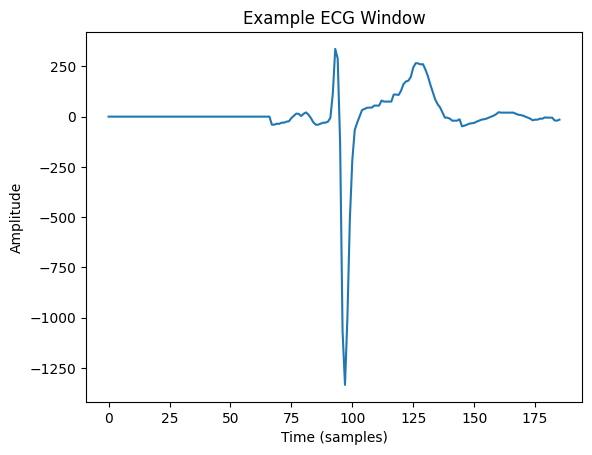

In [42]:
# Plot an example window
plt.plot(windows[0])
plt.title("Example ECG Window")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.show()

In [39]:
windows[0].shape

(186,)

In [40]:
len(windows[5])

186

In [41]:
peaks # numpy array, position of peack, along x-axis, at sampleing rate.

array([  26,  142,  258,  374,  490,  608,  727,  847,  965, 1079, 1200])

## Works!.  
To do next:  
Look carefully at each peak, compare with source data.  
Try other leads.  
Come up with fast way to split many files.  
Run simple CNN, one lead at a time, but feed all 12 leads.  
Use negative signals (keep as transforms, negative inverted image)  

Time 2:15 am Sunday Feb 23 stopped for now.  